In [1]:
#1. 데이터 수집
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)
(404,)
(102, 13)
(102,)


In [2]:
#2. 데이터의 유형이나 관련 필드 등을 분석 분류
#      CRIM : 도시별 1인당 범죄율   25,000제곱피트(sq.ft) 이상
#      ZN : 부지로 지정된 주거용 토지의 비율
#      INDUS: 도시별 비소매업용 면적 비율
#      CHAS: 찰스 강 더미 변수 (= 해당 구역이 강 경계를 포함하는 경우 1, 그렇지 않은 경우 0)
#      NOX: 산화질소 농도 (1,000만 분의 1)
#      RM: 가구당 평균 방 개수
#      AGE: 1940년 이전에 지어진 자가 주택의 비율
#      DIS: 보스턴 5개 고용 센터까지의 가중 거리
#      RAD: 방사형 고속도로 접근성 지수
#      TAX: 1만 달러당 재산세 전액 세율
#      PTRATIO: 도시별 교사-학생 비율
#      B 1000(Bk - 0.63)^2 (Bk는 도시별 흑인 비율)
#      LSTAT: 인구 하위 계층 비율 (%)
#      정답 MEDV: 자가 주택의 중간 가치 (1,000달러대)

#데이터 유형 검사
for ix,d in enumerate(x_train[0]):
  print(ix+1,"타입 : ",type(d))
print("정답데이터타입:",type(y_train[0]))
data_label = ["범죄율","토지비율","비소매업면적","강인접",
              "질소농도","평균방수","고택율","고용거리","고속접근","세율",
              "교학생비율","흑인비율","하위계층비율"]
for ix,d in enumerate(x_train[0]):
  print(f"{ix}. {data_label[ix]} : {d}",end=" | ")
print()
print("평균주택가격:",y_train[0]*1000*1400,"원")

1 타입 :  <class 'numpy.float64'>
2 타입 :  <class 'numpy.float64'>
3 타입 :  <class 'numpy.float64'>
4 타입 :  <class 'numpy.float64'>
5 타입 :  <class 'numpy.float64'>
6 타입 :  <class 'numpy.float64'>
7 타입 :  <class 'numpy.float64'>
8 타입 :  <class 'numpy.float64'>
9 타입 :  <class 'numpy.float64'>
10 타입 :  <class 'numpy.float64'>
11 타입 :  <class 'numpy.float64'>
12 타입 :  <class 'numpy.float64'>
13 타입 :  <class 'numpy.float64'>
정답데이터타입: <class 'numpy.float64'>
0. 범죄율 : 1.23247 | 1. 토지비율 : 0.0 | 2. 비소매업면적 : 8.14 | 3. 강인접 : 0.0 | 4. 질소농도 : 0.538 | 5. 평균방수 : 6.142 | 6. 고택율 : 91.7 | 7. 고용거리 : 3.9769 | 8. 고속접근 : 4.0 | 9. 세율 : 307.0 | 10. 교학생비율 : 21.0 | 11. 흑인비율 : 396.9 | 12. 하위계층비율 : 18.72 | 
평균주택가격: 21280000.0 원


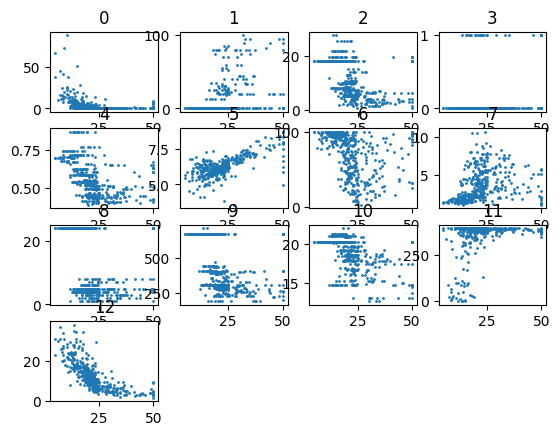

In [3]:
import matplotlib.pyplot as plt
for ix in range(len(x_train[0])):
  plt.subplot(4,4,ix+1)
  plt.scatter(y_train,x_train[:,ix],label=data_label[ix],s=1)
  plt.title(ix)
plt.show()

In [4]:
# 데이터 크기
for ix in range(len(x_train[0])):
  print(ix,".")
  print("max",x_train[:,ix].max(),end=":")
  print("min",x_train[:,ix].min(),end=":")
  print("std",x_train[:,ix].std(),end=":")
  print("mean",x_train[:,ix].mean(),end=":")
  print()

0 .
max 88.9762:min 0.00632:std 9.229290727197062:mean 3.74511056930693:
1 .
max 100.0:min 0.0:std 23.738277022572472:mean 11.48019801980198:
2 .
max 27.74:min 0.46:std 6.802872531209858:mean 11.104430693069308:
3 .
max 1.0:min 0.0:std 0.2409396328456904:mean 0.06188118811881188:
4 .
max 0.871:min 0.385:std 0.11714784679738591:mean 0.5573559405940595:
5 .
max 8.725:min 3.561:std 0.7089086269383819:mean 6.267081683168317:
6 .
max 100.0:min 2.9:std 27.906063441724413:mean 69.01064356435644:
7 .
max 10.7103:min 1.1296:std 2.027700499038347:mean 3.7402707920792078:
8 .
max 24.0:min 1.0:std 8.687588486254363:mean 9.44059405940594:
9 .
max 711.0:min 188.0:std 166.16850596316968:mean 405.8985148514852:
10 .
max 22.0:min 12.6:std 2.1976568890257115:mean 18.4759900990099:
11 .
max 396.9:min 0.32:std 93.99460145052457:mean 354.7831683168317:
12 .
max 37.97:min 1.73:std 7.245560851691073:mean 12.740816831683167:


In [5]:
# 데이터 전처리 과정 - 3번과 4번 필드를 제외한 데이터 정규화 스케일링
except_datas = [3,4]
norm_mean=[]
norm_std=[]
for ix in range(len(x_train[0])):
  if ix in except_datas:
    norm_mean.append(0)
    norm_std.append(0)
    continue
  norm_mean.append(x_train[:,ix].mean())
  norm_std.append(x_train[:,ix].std())
def normal_data(target_data):
  for ix in range(len(target_data[0])):
    if ix in except_datas:
      continue
    # 데이터를 표준 정규분포로 스케일링
    target_data[:,ix] = (target_data[:,ix]-norm_mean[ix])/norm_std[ix]
  return target_data

In [6]:
x_train = normal_data(x_train)
x_test = normal_data(x_test)
print(x_train[:3])
print(x_test[:3])
print(x_train[:,0].std())
print(x_train[:,0].mean())
print(x_train[:,-1].std())
print(x_train[:,-1].mean())


[[-0.27224633 -0.48361547 -0.43576161  0.          0.538      -0.1764426
   0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162  0.          0.415       1.89434613
  -1.91036058  1.24758524 -0.85646254 -0.34843254 -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258   0.          0.631      -1.82968811
   1.11048828 -1.18743907  1.67588577  1.5652875   0.78447637  0.22061726
  -1.30850006]]
[[ 1.55369355 -0.48361547  1.0283258   0.          0.679       0.23545815
   1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
   2.25092074]
 [-0.39242675 -0.48361547 -0.16087773  0.          0.547      -0.49947436
   0.85606329 -0.68396235 -0.39603557  0.15707841 -0.30759583  0.42733126
   0.47880119]
 [-0.39982927 -0.48361547 -0.86940196  0.          0.515      -0.39790979
  -0.84607575  0.52864277 -0.51114231 -1.094663    0.78447637  0.44807713
  -0.41415936]]
1.0
8.793845739605201

In [7]:
#4. 모델 생성
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
print(x_train.shape)

(404, 13)


In [8]:
import numpy as np
import random
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)
model = Sequential()
model.add(Input((13,)))
model.add(Dense(256,activation="relu"))
# res = model(np.array([x_train[0]]))
# print(len(res[0]))
# print(res)
model.add(Dropout(0.4))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="SGD",metrics=['mae'])


In [9]:
print(x_train[:].max())
print(x_test[:].max())
print(x_train[:].min())
print(x_test[:].min())
for ix,d in enumerate(x_train[0]):
  print(ix+1,"타입 : ",type(d))
print("정답데이터타입:",type(y_train[0]))
data_label = ["범죄율","토지비율","비소매업면적","강인접",
              "질소농도","평균방수","고택율","고용거리","고속접근","세율",
              "교학생비율","흑인비율","하위계층비율"]
for ix,d in enumerate(x_train[0]):
  print(f"{ix}. {data_label[ix]} : {d}",end=" | ")
print()
print("평균주택가격:",y_train[0]*1000*1400,"원")

9.234847178400434
4.135832294709218
-3.8172503201932804
-3.512256695833772
1 타입 :  <class 'numpy.float64'>
2 타입 :  <class 'numpy.float64'>
3 타입 :  <class 'numpy.float64'>
4 타입 :  <class 'numpy.float64'>
5 타입 :  <class 'numpy.float64'>
6 타입 :  <class 'numpy.float64'>
7 타입 :  <class 'numpy.float64'>
8 타입 :  <class 'numpy.float64'>
9 타입 :  <class 'numpy.float64'>
10 타입 :  <class 'numpy.float64'>
11 타입 :  <class 'numpy.float64'>
12 타입 :  <class 'numpy.float64'>
13 타입 :  <class 'numpy.float64'>
정답데이터타입: <class 'numpy.float64'>
0. 범죄율 : -0.27224633436918716 | 1. 토지비율 : -0.4836154708652858 | 2. 비소매업면적 : -0.4357616109179246 | 3. 강인접 : 0.0 | 4. 질소농도 : 0.538 | 5. 평균방수 : -0.1764426026362752 | 6. 고택율 : 0.8130618810863531 | 7. 고용거리 : 0.11669830334066378 | 8. 고속접근 : -0.6262490526587594 | 9. 세율 : -0.5951700310370815 | 10. 교학생비율 : 1.1485004386235524 | 11. 흑인비율 : 0.4480771345717882 | 12. 하위계층비율 : 0.8252201990576512 | 
평균주택가격: 21280000.0 원


In [10]:
# 훈련시작

y_mean=y_train.mean()
y_std = y_train.std()
y_train = (y_train-y_mean)/y_std
y_test = (y_test-y_mean)/y_std
fhist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.9874 - mae: 0.7379 - val_loss: 0.6819 - val_mae: 0.5991
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7686 - mae: 0.6194 - val_loss: 0.5154 - val_mae: 0.5261
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6352 - mae: 0.5383 - val_loss: 0.4065 - val_mae: 0.4693
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5614 - mae: 0.5064 - val_loss: 0.3271 - val_mae: 0.4201
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5469 - mae: 0.4999 - val_loss: 0.2753 - val_mae: 0.3828
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4616 - mae: 0.4473 - val_loss: 0.2356 - val_mae: 0.3559
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4909 - mae: 0.4685 - val_loss: 0.2165 - val_mae: 0.3438
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4439 - mae: 0.4431 - val_loss: 0.2050 - val_mae: 0.3364
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4

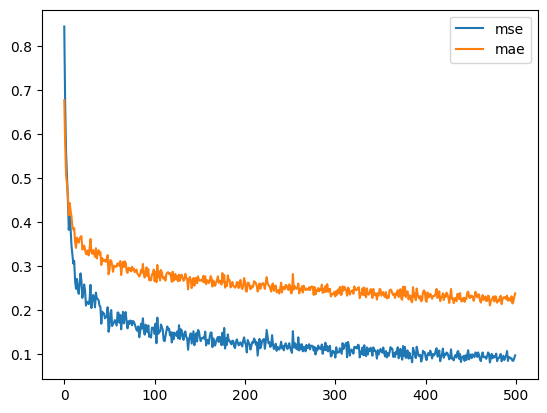

In [11]:
plt.plot(fhist.history["loss"],label="mse")
plt.plot(fhist.history["mae"],label="mae")
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


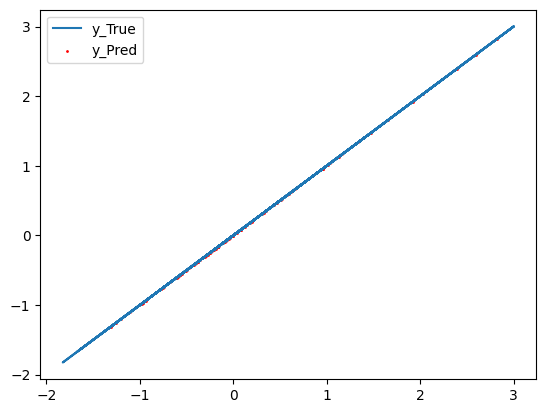

-0.39080722483352276
[-0.40148118]


In [12]:
y_pred = model.predict(x_test)
plt.plot(y_test,y_test,label="y_True")
plt.scatter(y_pred,y_pred,label="y_Pred",c="red",s=1)
plt.legend()
plt.show()
print(y_test[1])
print(y_pred[1])

In [14]:
#오차율 계산
print(y_pred.shape)
print(y_test.shape)
y_pred = y_pred.reshape(-1)
print(y_pred.shape)

(102, 1)
(102,)
(102,)


In [28]:
# t = (y - mean) /std >  y=t*std+mean
#y_mean
#y_std
y_pred = y_pred*y_std+y_mean
y_test = y_test*y_std+y_mean
print(y_pred[1])
print(y_test[1])
print((1-(y_pred[1]/y_test[1]))*100)
rate = 1-y_pred/y_test
print(rate[:5])
rate = np.absolute(rate)
err_rate_mean = rate[:5].mean()
print(f"현재 모델의 전체 오차 평균 백분율은 {err_rate_mean:.2%}")


119476846.22984284
120024194.51329489
0.4560316240167839
[-0.41167613  0.00456032 -0.09151422 -0.14114697 -0.03870384]
현재 모델의 전체 오차 평균 백분율은 13.75%


15.2
